# IMPORTING LIBRARIES AND DATASET

In [ ]:
# importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (60000, 28, 28)
y train shape :  (60000,)
X test shape :  (10000, 28, 28)
y test shape :  (10000,)


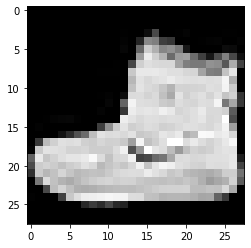

In [ ]:
# Visualize a sample image
plt.imshow(X_train[0], cmap = 'gray')

# PERFORMING DATA VISUALIZATION

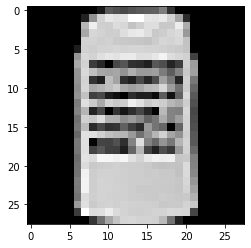

In [ ]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'gray')

In [ ]:
label = y_train[i]
label

0

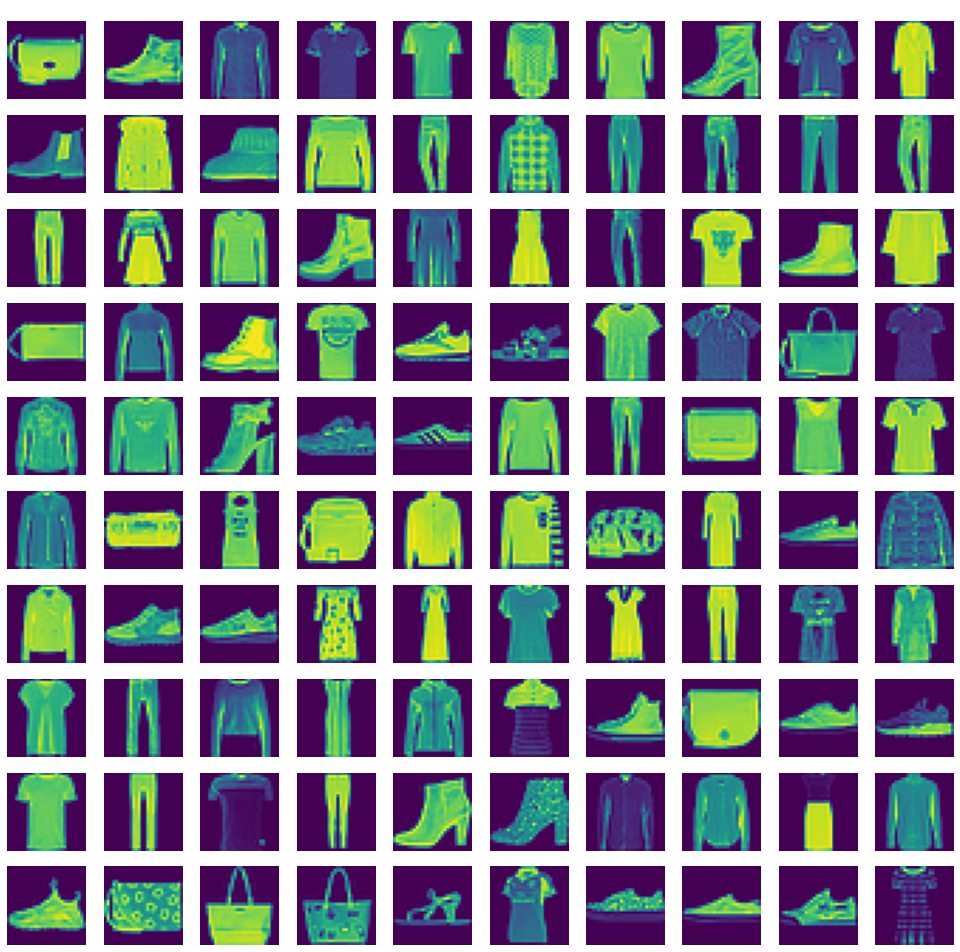

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 10 x 10 matrix into 100 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 10, color = 'white')
    axes[i].axis('off')



# DATA PREPROCESSING

In [ ]:
# normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# add some noise
noise_factor = 0.3
noise_train = []

for image in X_train:
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0 , 1)
    noise_train.append(noisy_image)

In [ ]:
noise_train = np.array(noise_train)

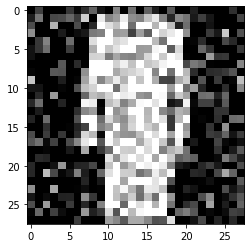

In [ ]:
plt.imshow(noise_train[25], cmap = 'gray')

In [ ]:
# add noise to testing dataset
noise_factor = 0.1
noise_test = []
for image in X_test:
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0 , 1)
    noise_test.append(noisy_image)

In [ ]:
noise_test = np.array(noise_test)

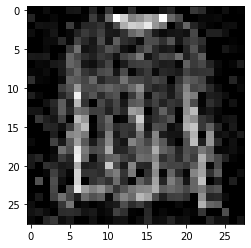

In [ ]:
plt.imshow(noise_test[25], cmap = 'gray')

# BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [ ]:
autoencoder = tf.keras.models.Sequential()
# encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))
#bottleneck coding : (7, 7, 8)
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))
# decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_train.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 554us/sample - loss: 0.3991 - val_loss: 0.3167
Epoch 2/10
60000/60000 [==============================] - 27s 444us/sample - loss: 0.3170 - val_loss: 0.3037
Epoch 3/10
60000/60000 [==============================] - 27s 445us/sample - loss: 0.3101 - val_loss: 0.2990
Epoch 4/10
60000/60000 [==============================] - 27s 450us/sample - loss: 0.3059 - val_loss: 0.2939
Epoch 5/10
60000/60000 [==============================] - 27s 456us/sample - loss: 0.3036 - val_loss: 0.2907
Epoch 6/10
60000/60000 [==============================] - 27s 450us/sample - loss: 0.3023 - val_loss: 0.2898
Epoch 7/10
60000/60000 [==============================] - 27s 454us/sample - loss: 0.3014 - val_loss: 0.2891
Epoch 8/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.3009 - val_loss: 0.2885
Epoch 9/10
60000/60000 [==============================] - 28s 469us/sample - l

# EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
evaluation = autoencoder.evaluate(noise_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))

10000/10000 [==============================] - 3s 293us/sample - loss: 0.2874


In [ ]:
print("Testing loss : {:.3f}".format(evaluation))

Testing loss : 0.287


In [ ]:
predicted = autoencoder.predict(noise_test[: 10].reshape(-1, 28, 28, 1))

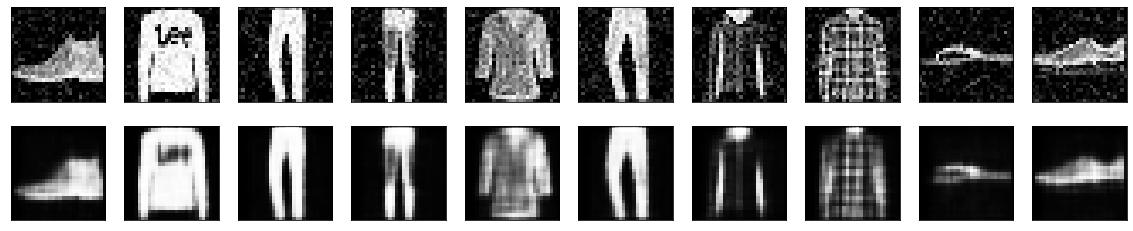

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)